# SIMULACIÓN | PROYECTO1_BARRIENTOS_BUSTAMANTE




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: 9 de noviembre 23:59 horas.  


- Este trabajo pondera un 25% del total del curso 

**Integrantes: Maria Barrientos - Reinaldo Bustamante** 

In [2]:

# Pandas and numpy for data manipulation
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
%matplotlib inline
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize
from IPython.display import Image
from IPython.display import display,Math
import math

In [3]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (0,8 pts) En este contexto, defina 3 eventos de interés A, B y C, y por medio de la simulación calcule: 
    
    (a) ${P(A)}$, ${P(B)}$, ${P(C)}$ 
    
    (b) ${P(A \cup B)}$ 

    (c) ${P(A \cap C)}$

Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$



2. (0,6 pts) Defina una probabilidad condicional no independiente y calcúlela por medio de la simulación considerando el teorema de Bayes. Escriba la formulación del teorema aplicado a su caso (Prob. Cond, a priori, verosimilitud y evidencia). 



#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [4]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0, pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [5]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [6]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[100, 81.34838536067168, 100, 118.65161463932832]
[34.352128999898504, 146.99625636077317, 100, 118.65161463932832]
[116.13443043069842, 146.99625636077317, 100, 36.86931320852841]
[7.826524820918621, 146.99625636077317, 208.3079056097798, 36.86931320852841]
[94.05083771276037, 60.77194346893143, 208.3079056097798, 36.86931320852841]
[94.27398009798567, 60.77194346893143, 208.3079056097798, 36.64617082330311]
[62.71635747127358, 92.32956609564353, 208.3079056097798, 36.64617082330311]
[73.49606960018116, 81.54985396673595, 208.3079056097798, 36.64617082330311]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [7]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.7   55   75  100  126  145
 20,000 0.49  96.9    1   11   72  224  437
 40,000 0.49  98.8    1   11   71  231  460
 60,000 0.50  99.0    1   10   71  230  466
 80,000 0.50 100.4    1   11   68  229  473
100,000 0.50  99.5    1   10   71  232  467
120,000 0.50  99.8    1   10   70  229  467
140,000 0.50 101.5    1   10   69  232  475
160,000 0.51 101.5    1    9   68  236  470
180,000 0.50 101.5    1   10   70  231  474
200,000 0.51 102.9    1   10   69  232  467


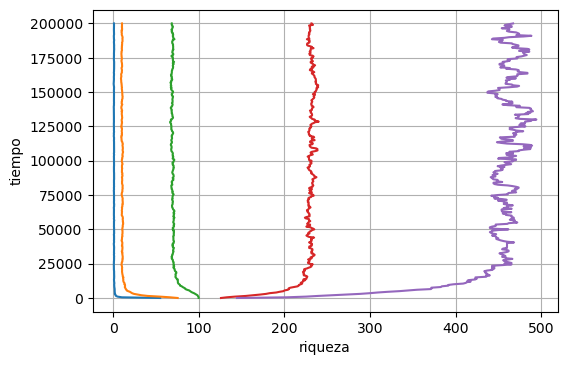

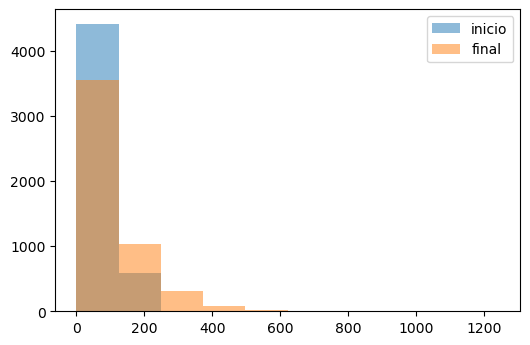

In [8]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos de una variable aleatoria. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio: https://archive.ics.uci.edu/ml/datasets.php . 

0. Indique la fuente de sus datos. 


1. (0,6 pts) Descripcion de datos: tome un conjunto de datos en ${\cal R}$ y descríbalo estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (0,8 pts) Seleccione aleatoriamente una cantidadN de sus datos y calcule sus estadísticos muestrales (al menos 3), luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (0,8 pts) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,6 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (0,8 pts) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 


**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Desarrollo

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Parte I : Propiedades de las Probabilidades

In [9]:
def show2(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    sd = []
    p10 = []
    p90 = []
    g = []
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            p10.append(percent(10, pop))
            p90.append(percent(90, pop))
            g.append(gini(pop))
            sd.append(statistics.stdev(pop))#lista con la desviación estándar por iteración
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           
    ##returns
    return g, sd, p10, p90

Para la simulación usaremos una cantidad de dinero 500 y una población de tamaño 10000, con una transacción "justa"

**Definicion de eventos**

- La desviación estándar de la población es mayor o igual que $500$ pesos.
- El percentil 10% es menor o igual que $50$ pesos
- El percentil 90% es mayor o igual que $1000$ pesos

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  99.5  269  373  500  629  732
 40,000 0.49 490.0    5   55  352 1158 2218
 80,000 0.50 498.7    5   49  349 1158 2276
120,000 0.50 500.3    6   51  347 1153 2303
160,000 0.50 495.9    6   55  351 1147 2247
200,000 0.50 501.8    5   53  349 1137 2356
240,000 0.50 499.8    6   55  345 1161 2303
280,000 0.50 496.5    6   55  346 1154 2294
320,000 0.50 502.9    6   53  344 1156 2335
360,000 0.50 493.8    5   52  344 1161 2240
400,000 0.50 501.9    6   54  348 1130 2326


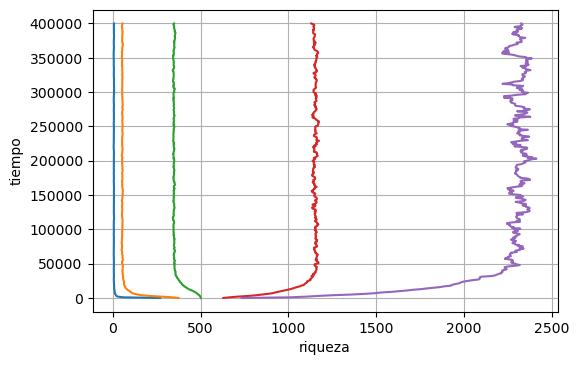

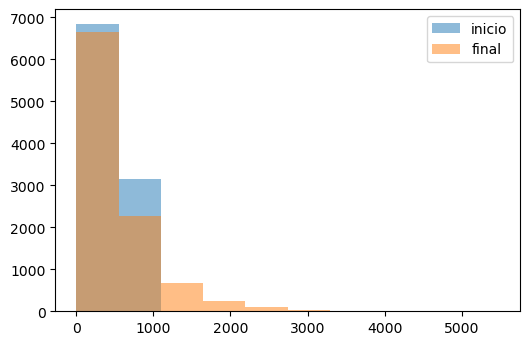

In [10]:
N  = 10000 # Tamaño de la población
MU = 500. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

g, sd, p10, p90 = show2(dinerop)

**1.a)**  ${P(A)}$, ${P(B)}$, ${P(C)}$

In [11]:
print('sd: ', sd)
print('p10: ', p10)
print('p90: ', p90)

sd:  [99.50755820412665, 490.02134297779133, 498.7316253348695, 500.3179069728856, 495.90019767870785, 501.80148109558985, 499.76840964231695, 496.5293063676491, 502.87137104763485, 493.7945799991808, 501.9228059085622]
p10:  [373.26948040116577, 54.55311996997514, 49.18947878700874, 51.01559746793055, 54.884001194642416, 52.84997007956855, 54.542627854365605, 54.526018937188155, 53.16063033105502, 52.144949419117665, 54.43374881565393]
p90:  [628.7648677863386, 1157.6139248685918, 1158.1325346935728, 1152.5394705619049, 1147.1607386948426, 1137.4602017216207, 1160.8505130772667, 1153.7976664495407, 1155.5398457801411, 1161.3485229033556, 1129.6986326470455]


In [12]:
a = b = c = 0
for i in range(len(sd)):
    if (sd[i] >= 500): a+=1
    if (p10[i] <= 50): b+=1
    if (p90[i] >= 1000): c+=1

pA = a/len(sd)
pB = b/len(p10)
pC = c/len(p90)

print('La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos es: {}'.format(pA))
print('La probabilidad de que el percentil 10% sea menor o igual a 50 pesos es: {}'.format(pB))
print('La probabilidad de que el percentil 90% sea mayor o igual a 1000 pesos es: {}'.format(pC))

La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos es: 0.36363636363636365
La probabilidad de que el percentil 10% sea menor o igual a 50 pesos es: 0.09090909090909091
La probabilidad de que el percentil 90% sea mayor o igual a 1000 pesos es: 0.9090909090909091


Por medio de la simulación tenemos que:

${P(A)} = 0.36 $ 

${P(B)} = 0.09$

${P(C)} = 0.91\%$

**1.b)** ${P(A \cup B)}$

In [13]:
AuB = pA + pB - (pA * pB)
print('La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos o el percentil 10% sea menor o igual a 50 es: {}'.format(AuB))

La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos o el percentil 10% sea menor o igual a 50 es: 0.42148760330578516


Por medio de la simulación, tenemos que:

${P(A \cup B)} = 0.42$

**1.c)** ${P(A \cap C)}$

In [14]:
AnC = pA * pC
print('La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos y el percentil 90% sea mayor o igual a 1000 es: {}'.format(AnC))

La probabilidad de que la desviación estándar sea mayor o igual a 500 pesos y el percentil 90% sea mayor o igual a 1000 es: 0.3305785123966942


Por medio de la simulación, obtenemos que:

${P(A \cap C)} = 0.33$

**2)**

En la misma situación de la simulación (Tamaño de población 10000 y media de dinero 500), definimos dos eventos dependientes:

- El índice de gini es menor o igual a 0.5
- El percentil 90% es mayor o igual a 1000

Estos eventos son dependientes porque el índice de gini indica el nivel de desigualdad en la población, mientras menor sea este índice, menor desigualdad de recursos existirá, recordemos que la media total de dinero es de 500

La probabilidad a calcular será:

${P(A|B)}$

El Teorema de Bayes nos indica que:

$${P(A|B)}  =  \frac{P(B|A)P(A)}{P(B)}$$

Donde,

$A$: Hipótesis nula, corresponde al evento donde el índice de gini es menor o igual a 0.5

$B$: Evidencia, corresponde al evento donde el percentil 90% es mayor o igual a 1000

${P(A)}$: Probabilidad a priori, en nuestro caso corresponde a la probabilidad de que el índice de gini sea menor o igual a 0.5

${P(B)}$: Probabilidad marginal de B, corresponde a la probabilidad de que el percentil 90% sea mayor o igual a 1000 pesos

${P(B|A)}$: Función de verosimilitud, corresponde a la probabilidad de que el percentil 90% sea mayor o igual a 1000 pesos

${P(A|B)}$: Probabilidad a posteriori, resultado al que queremos llegar y que indica la probabilidad de que el índice sea menor o igual a 0.5 dado que el percentil es mayor o igual a 1000

In [15]:
h = 0
for i in range(len(g)):
    if (g[i] <= 0.5): h+=1
        
pH = h/len(g)
#P(B) corresponde a la probabilidad de que el percentil 90 sea >= 1000, calculado anteriormente (pC)

#Cálculo de P(AnB)
anb = 0
for j in range(len(g)):
    if (g[j] <= 0.5 and p90[j] >= 1000): anb+=1        
AnB = anb/len(g)

#Cálculo de P(B|A)
pBA = AnB/pC

##Cálculo P(A|B)
pAB = (pBA*pH)/pC
print (pAB)

0.56


Anteriormente habíamos calculado la probabilidad de la evidencia, por lo que reutilizamos su valor en este bloque. Además sabemos que

$${P(B|A)} = \frac{P(A\cap B)}{P(B)}$$

Por lo que procedemos a hacer su cálculo con los valores obtenidos desde la simulación, con esto listo, podemos realizar el cálculo de ${P(A|B)}$, nuestra probabilidad a posteriori. Esto nos da como resultado que:

${P(A|B) = 0.42}$

## Parte II: Distribuciones 

**Fuente de datos a utilizar**

In [16]:
abalone = pd.read_csv('data/abalone.data')


In [17]:
abalone

,Sexo,Largo(mm),Diametro(mm),Alto(mm),Peso entero(g),Peso sin concha(g),Peso visceras(g),Peso cascara(g),anillos
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Los datos utilizados seran acerca de los abalotes, estos son unos moluscos perteneciente a la familia de moluscos gasteropodos.  
A continuacion ocuparemos la columna Peso entero(g) para realizar el siguiente analisis  

link: https://archive.ics.uci.edu/ml/datasets/Abalone

**1)**

**Descripcion de datos**

In [18]:
datos = abalone['Peso entero(g)']

In [19]:
datos.describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Peso entero(g), dtype: float64

**Histograma**

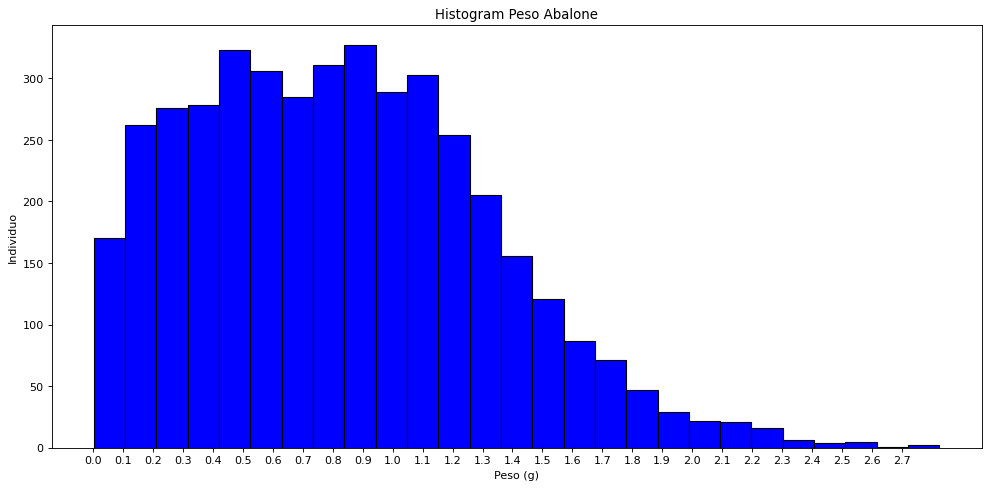

In [20]:
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

# Make the histogram using matplotlib, bins must be integet
ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(2.8/0.1)))

plt.title('Histogram Peso Abalone')
plt.xlabel('Peso (g)'); plt.ylabel('Individuo');
plt.xticks(np.arange(0, 2.8, 0.1))

plt.show()

**Distribucion de probabilidad empirica**

**2)**

**Muestra aleatoria**

In [21]:
N = 77
aleatoria = np.random.choice(list(datos),N,replace= False)
aleatoria

array([0.4265, 1.087 , 0.869 , 1.103 , 1.1375, 1.059 , 0.537 , 1.065 ,
       1.3905, 0.6265, 0.6855, 0.0985, 0.18  , 0.9615, 0.5745, 0.6345,
       0.0965, 0.3295, 0.97  , 1.885 , 0.192 , 1.273 , 0.775 , 1.089 ,
       0.924 , 1.3435, 0.8145, 0.467 , 0.984 , 0.4315, 0.98  , 1.3445,
       0.796 , 0.0345, 1.233 , 0.4865, 0.6885, 1.146 , 1.234 , 1.34  ,
       0.746 , 1.489 , 0.664 , 2.505 , 0.601 , 0.9175, 0.2855, 0.0425,
       1.219 , 0.187 , 1.4155, 0.862 , 1.151 , 0.4565, 0.1185, 0.547 ,
       0.7365, 0.1975, 1.0635, 0.3   , 0.9685, 0.7535, 0.106 , 0.66  ,
       0.844 , 0.067 , 1.124 , 0.7575, 0.4835, 0.8585, 0.8935, 0.223 ,
       0.0685, 1.1345, 1.498 , 0.9995, 1.3485])

**Calculo estadisticos**

In [22]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(aleatoria)/len(aleatoria)
curtos = stats.kurtosis(aleatoria)
asim = stats.skew(aleatoria)
print('Promedio:',promedio)
print('curtosis:',curtos)
print('asimetria:',asim)

Promedio: 0.7998116883116881
curtosis: 0.904692929677557
asimetria: 0.49744641287076424


Ahora aumentaremos el N

In [23]:
N = np.arange(77,4177,100)

In [24]:
N

array([  77,  177,  277,  377,  477,  577,  677,  777,  877,  977, 1077,
       1177, 1277, 1377, 1477, 1577, 1677, 1777, 1877, 1977, 2077, 2177,
       2277, 2377, 2477, 2577, 2677, 2777, 2877, 2977, 3077, 3177, 3277,
       3377, 3477, 3577, 3677, 3777, 3877, 3977, 4077])

In [25]:
N = np.arange(77,4177,100)
mean = [promedio]
cur = [curtos]
asi = [asim]
for i in range(len(N)-1):
    aleat = np.random.choice(datos,N[i+1],replace = False)
    mean += [sum(aleat)/len(aleat)]    
    cur += [stats.kurtosis(aleat)]
    asi += [stats.skew(aleat)]

Text(0, 0.5, 'Asimetria')

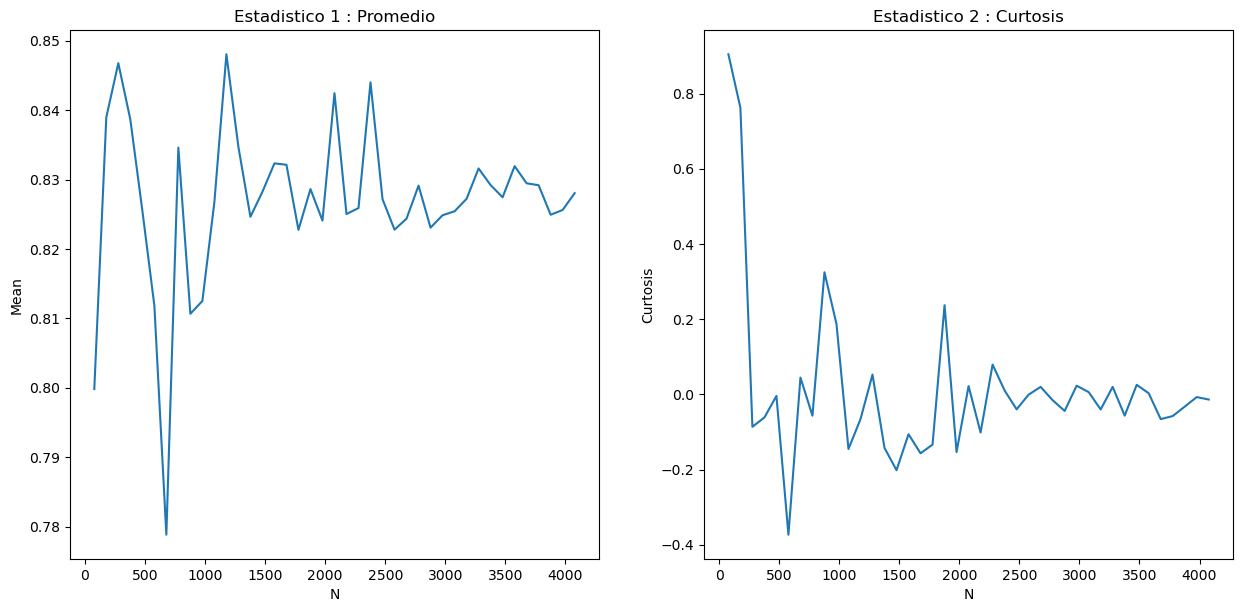

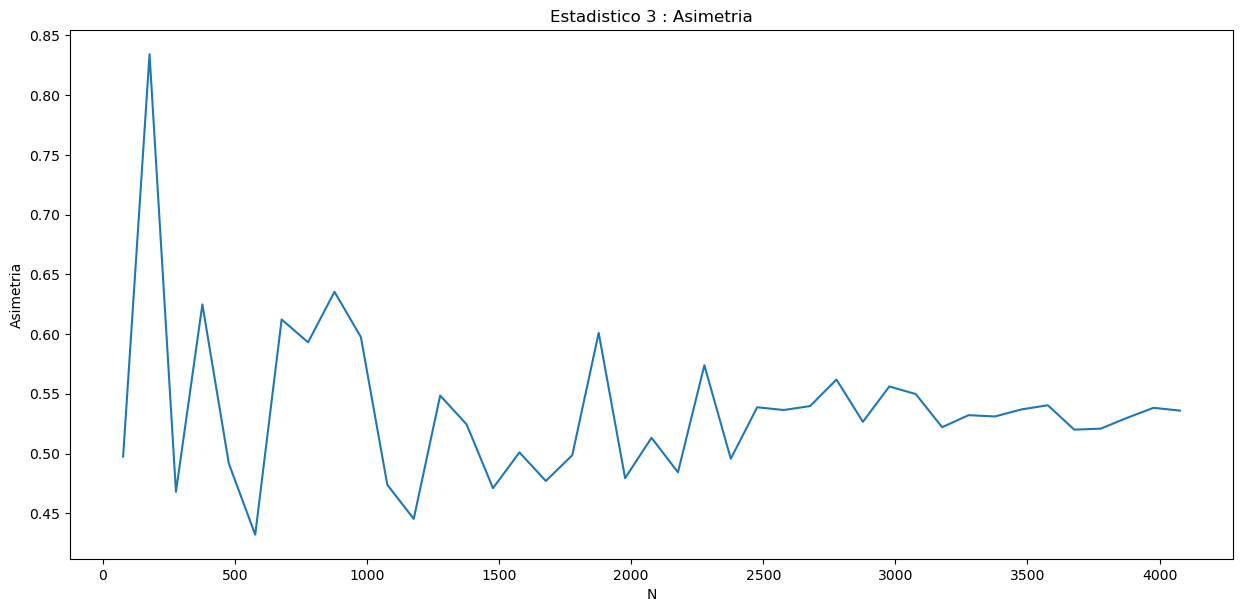

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
fig, ax1 = plt.subplots(1, figsize=(15, 7))
ax[0].plot(N,mean)
ax[0].set_title('Estadistico 1 : Promedio')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Mean')
ax[1].plot(N,cur)
ax[1].set_title('Estadistico 2 : Curtosis')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Curtosis')
ax1.plot(N,asi)
ax1.set_title('Estadistico 3 : Asimetria')
ax1.set_xlabel('N')
ax1.set_ylabel('Asimetria')

**ESPACIO PARA RESPONDER ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.**

**3)**

In [27]:
n = 1000
promedio = []
curtos = []
asim = []
for i in range(n):
    random = np.random.choice(datos,1000,replace = False)
    promedio += [sum(random)/len(random)]
    curtos += [stats.kurtosis(random)]
    asim += [stats.skew(random)]


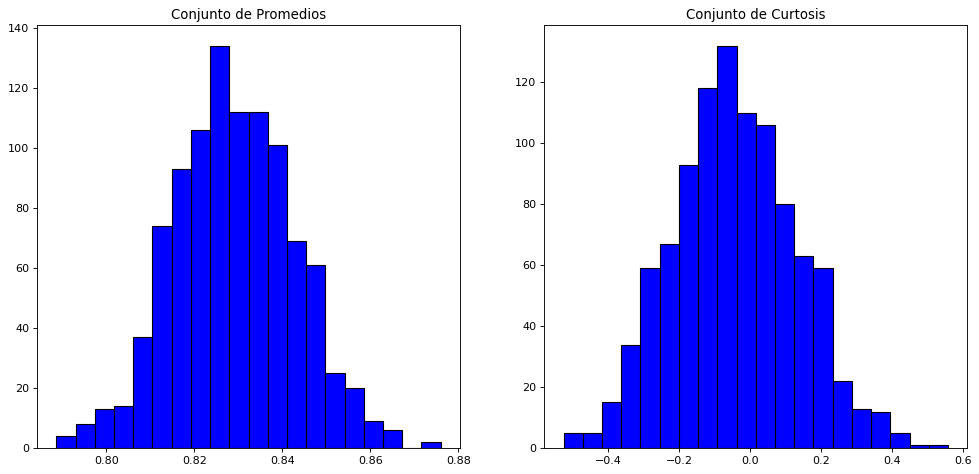

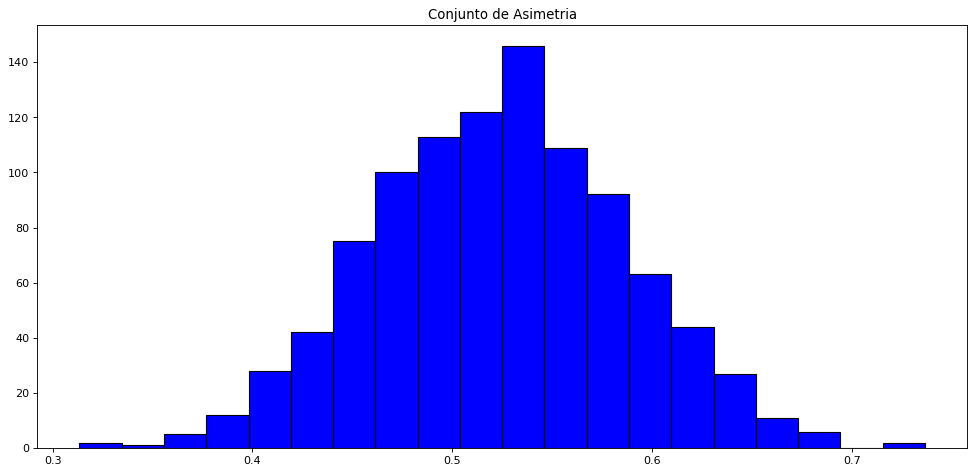

In [29]:
fig, ax = plt.subplots(1, 2,figsize=(15, 7), dpi=80)
fig, ax1 = plt.subplots(1,figsize=(15, 7), dpi=80)
ax[0].hist(promedio, color = 'blue',edgecolor='black', bins=(20))
ax[1].hist(curtos, color = 'blue',edgecolor='black', bins=(20))
ax1.hist(asim, color = 'blue',edgecolor='black', bins=(20))
ax[0].set_title('Conjunto de Promedios');
ax[1].set_title('Conjunto de Curtosis');
ax1.set_title('Conjunto de Asimetria');

**ESPACIO PARA RESPONDER ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta..**

**4)**

Podemos ver que el histograma de los datos se parece a una distribucion lognormal. esto es debido a que tenemos datos continuos ademas de ser asimetrico y la mayoria de los valores positivos. esto se puede ver mejor en la siguiente imagen.

In [ ]:
Image("distributions_choice.png")

Ahora veremos como se ajustan esta distribucion

In [ ]:
## ajuste de distribución LogNormal considerando Estimadores de MV
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(2.8/0.1)))
ax2 = ax.twinx()
args = scipy.stats.lognorm.fit(datos)
print(args)
vec = np.arange(0, 3, 0.1)

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args[0],scale=args[2],loc=args[1]))
ax2.plot(vec,pvec)
plt.xticks(np.arange(0, 2.8, 0.1))
plt.draw()


In [ ]:
datos2 = scipy.stats.lognorm.rvs(*args,size=100)

scipy.stats.kstest(datos, datos2)

**ESPACIO PARA RESPONDER ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.**

**5)**

## Parte III: Conclusiones



**1)**

**2)**